# Mini Project

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## Loading Data

In [2]:
Train_data = pd.read_csv("Train.csv")
Test_data = pd.read_csv("Test.csv")

In [3]:
# Train_data.head(10)
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Test_data.head(10)
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [5]:
data = pd.concat([Train_data.assign(Type="train"), Test_data.assign(Type="test")])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


## Structure of DataSet
- Checking Every Feature

In [6]:
data.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


In [7]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
data.sort_values(["Item_Visibility", "Outlet_Identifier", "Type"], ascending=[False, True, True])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
854,FDU13,NaN,low fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672,train
3750,NCZ18,NaN,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094,train
2609,NCE31,NaN,low fat,0.323637,Household,35.5216,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test
1805,FDJ56,NaN,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400,train
4208,FDU13,8.355,Low Fat,0.313935,Canned,146.5418,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,DRI03,6.030,Low Fat,0.000000,Dairy,175.1028,OUT049,1999,Medium,Tier 1,Supermarket Type1,1593.9252,train
7495,FDV47,17.100,Low Fat,0.000000,Breads,85.5566,OUT049,1999,Medium,Tier 1,Supermarket Type1,1860.2452,train
7574,FDV26,20.250,Regular,0.000000,Dairy,194.2794,OUT049,1999,Medium,Tier 1,Supermarket Type1,4291.7468,train
7927,FDT59,13.650,Low Fat,0.000000,Breads,229.4668,OUT049,1999,Medium,Tier 1,Supermarket Type1,4837.7028,train


There is Missing data in Outlet_Size (s-m-high) and Item_Weight (number)
In Item_Fat_Content : LF should be Low Fat & reg should be Regular


In [10]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

## Data Preprocessing

### Checking for Missing Values

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Type                            0
dtype: int64

As we can see that there are missing values in Item_Weight and Outlet_Size
- Note: The missing values in Item_outlet_Sales are the test data and not actually missing values

In [12]:
data[["Item_Weight", "Item_Fat_Content", "Item_Type"]]
data[data["Item_Type"] == "Dairy"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,train
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,FDB15,10.895,Low Fat,0.137088,Dairy,265.0568,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5631,FDA03,18.500,Regular,0.045556,Dairy,147.1102,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5649,DRH03,17.250,Low Fat,0.035135,Dairy,94.7120,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [13]:
def Fill_Missing_Values(data, columns=[]):
    for x in columns:
        # mode = data[x].mode()[0]
        # data[x].replace(np.nan, mode, inplace = True)
        
        missing = list(data[data[x].isnull()].index)
        for i in missing:
            mode = data[x].dropna().mode()[0]
            # Gets the Mode of rows with similar features if available
            Assumed_value = data[x][(data["Item_Fat_Content"] == data.iloc[i]["Item_Fat_Content"])
                                        & (data["Item_Type"] == data.iloc[i]["Item_Type"])
                                        & (data["Outlet_Identifier"] == data.iloc[5656]["Outlet_Identifier"])].mode()[0]
            if type(Assumed_value) != str:
                if np.isnan(Assumed_value):
                    data[x][i] = mode
                else:
                    data[x][i] = Assumed_value
            else:
                if Assumed_value == False:
                    data[x][i] = mode
                else:
                    data[x][i] = Assumed_value
                
        # print(AssumedAge)
            

In [14]:
# Testing function
Assumed_value = data.Item_Weight[(data["Item_Fat_Content"] == data.iloc[5656]["Item_Fat_Content"])
                                        & (data["Item_Type"] == data.iloc[5656]["Item_Type"])
                                        & (data["Outlet_Identifier"] == data.iloc[5656]["Outlet_Identifier"])].mode()

In [15]:
missing_Item_Weight = list(data[data["Item_Weight"].isnull()].index)
len(missing_Item_Weight)

2439

In [16]:
Fill_Missing_Values(data, columns = ["Item_Weight", "Outlet_Size"])

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1535498662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = Assumed_value
C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1535498662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = Assumed_value
C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1535498662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = Assumed_value
C:\Users\ziadh\A

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1535498662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = Assumed_value
C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1535498662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = Assumed_value
C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1535498662.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = Assumed_value
C:\Users\ziadh\A

In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Type                            0
dtype: int64

### Removing Outliners

In [18]:
from collections import Counter

def detectOutliers(data, n, features):
    outlier_rows = []
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlierStep = IQR * 1.5
        outlierList = data[(data[col] < Q1 - outlierStep ) | (data[col] > Q3 + outlierStep)].index
        outlier_rows.extend(outlierList)
    # Counts the frequency of occurrences of each row index
    outlier_rows = Counter(outlier_rows)
    multiple_outliers = list(key for key, value in outlier_rows.items() if value >= n)
    return multiple_outliers

In [19]:
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
outliers_to_drop = detectOutliers(data, 2, numeric_columns)
print("these rows will be dropped due to their outlier values: {} ".format(outliers_to_drop))
len(outliers_to_drop)

these rows will be dropped due to their outlier values: [] 


0

In [20]:
print("Before removing the outliers we have {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After removing the outliers we have {} rows".format(len(data)))

Before removing the outliers we have 14204 rows
After removing the outliers we have 14204 rows


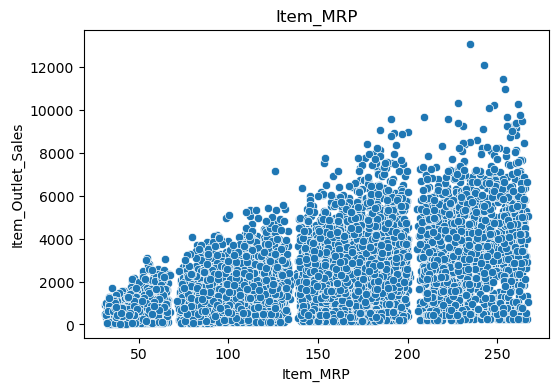

In [21]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data["Item_MRP"], y = data["Item_Outlet_Sales"])
plt.title(f"Item_MRP")
plt.show()

In [22]:
summary_stats = data[numeric_columns].describe()
print(summary_stats)

        Item_Weight  Item_Visibility      Item_MRP
count  14204.000000     14204.000000  14204.000000
mean      12.873141         0.065953    141.004977
std        4.374964         0.051459     62.086938
min        4.555000         0.000000     31.290000
25%        9.195000         0.027036     94.012000
50%       12.850000         0.054021    142.247000
75%       16.025000         0.094037    185.855600
max       21.350000         0.328391    266.888400


### Checking for Duplicates

In [23]:
duplicate = data.duplicated()
print(duplicate.sum())

0


In [24]:
data = data.set_index("Item_Identifier")
data.index.names = [None]


In [25]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Small,Tier 3,Supermarket Type2,443.4228,train
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
NCD19,20.20,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [26]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

### Data Encoding

In [27]:
label_encoder = LabelEncoder()

# Encode labels in column 'Outlet_Identifier'.
data['Outlet_Identifier']= label_encoder.fit_transform(data['Outlet_Identifier'])
data['Item_Type']= label_encoder.fit_transform(data['Item_Type'])
data['Outlet_Type']= label_encoder.fit_transform(data['Outlet_Type'])
data['Outlet_Location_Type']= label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Size']= data["Outlet_Size"].map({"Small": 0, "Medium": 1, "High": 2})
data['Item_Fat_Content']= data["Item_Fat_Content"].map({"Low Fat":1, "Regular":0})

In [28]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
DRC01,5.92,0,0.019278,14,48.2692,3,2009,0,2,2,443.4228,train
FDN15,17.50,1,0.016760,10,141.6180,9,1999,0,0,1,2097.2700,train
FDX07,19.20,0,0.000000,6,182.0950,0,1998,0,2,0,732.3800,train
NCD19,20.20,1,0.000000,9,53.8614,1,1987,2,2,1,994.7052,train


## Visualisation

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\2828646952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


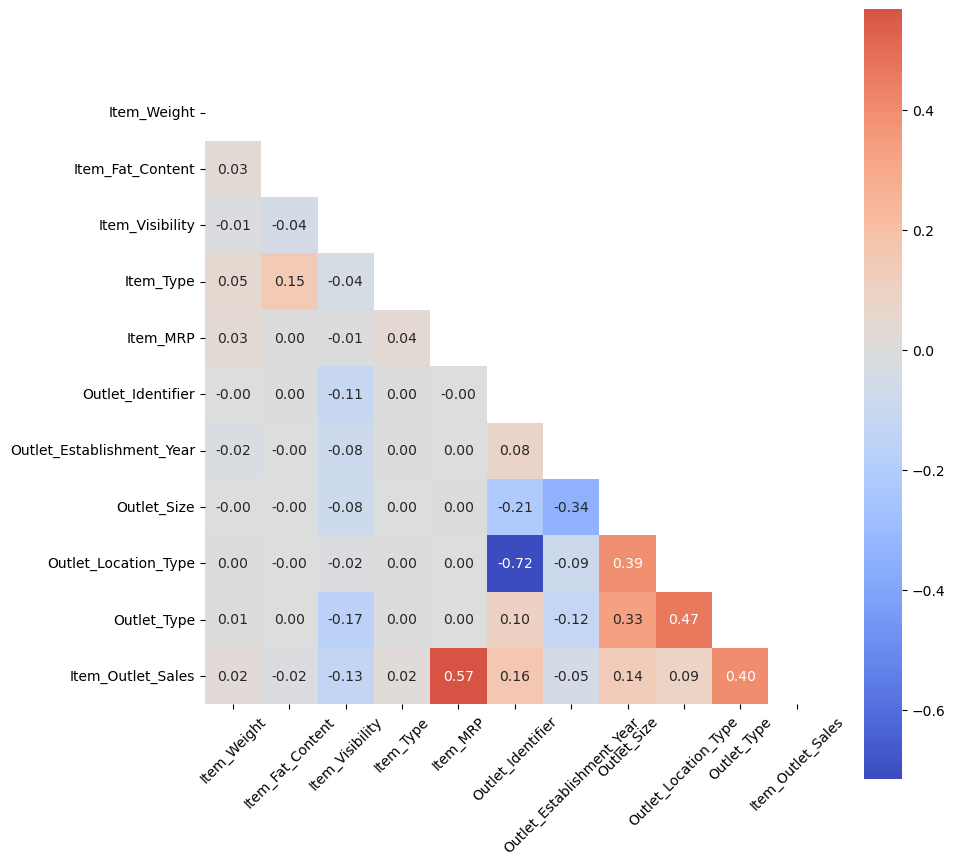

In [29]:
# Finding correlations between features and outcome
def dataCorr(data):
    data_corr = data.corr()
    mask = np.zeros_like(data_corr)
    mask[np.triu_indices_from(mask)] = True
    plt.subplots(figsize=(10, 10))
    dataplot = sns.heatmap(data_corr, annot=True, cmap="coolwarm", mask=mask, center=0, square=True, fmt=".2f")
    plt.xticks(rotation = 45)
    plt.show()
    
dataCorr(data)

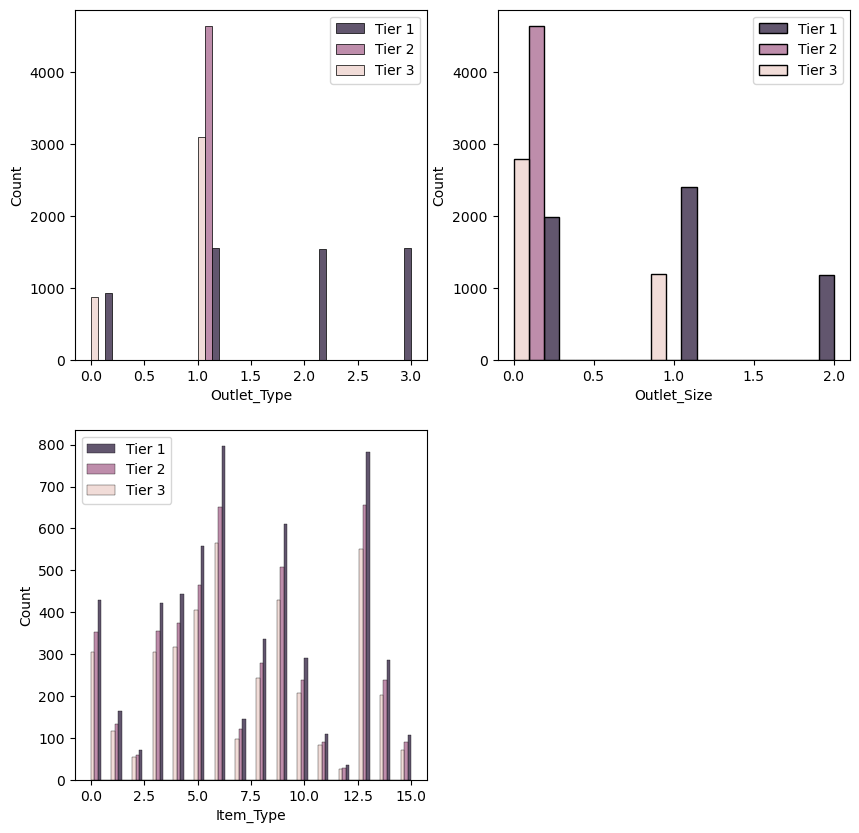

In [30]:
plt.subplots(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(data = data, x = "Outlet_Type", hue = "Outlet_Location_Type", multiple="dodge")
plt.legend(labels = ["Tier 1", "Tier 2", "Tier 3"])
plt.subplot(2, 2, 2)
sns.histplot(data = data, x = "Outlet_Size", hue = "Outlet_Location_Type", multiple="dodge", bins = 7)
plt.legend(labels = ["Tier 1", "Tier 2", "Tier 3"])
plt.subplot(2, 2, 3)
sns.histplot(data = data, x = "Item_Type", hue = "Outlet_Location_Type", multiple="dodge")
plt.legend(labels = ["Tier 1", "Tier 2", "Tier 3"])
plt.show()

#### Observation
For Outlet_Type: 
- Tier 1 is in all types
- Tier 2 was in just one type

For Outlet_Size:
- All big-sized outlets are Tier 1
- Tier 1 is in all sizes
- All Tier 2 are small-sized outlets

For Item_Type:
- Tier 1 has the most from each type of item, Tier 2 second, and lastly would be Tier 3

In [31]:
data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [32]:
scaler = MinMaxScaler()
data["Item_Visibility"] = scaler.fit_transform(data["Item_Visibility"].values.reshape(-1, 1))

In [33]:
data.Item_Visibility.unique()

array([0.04886645, 0.05870508, 0.05103696, ..., 0.43542886, 0.22390557,
       0.31888866])

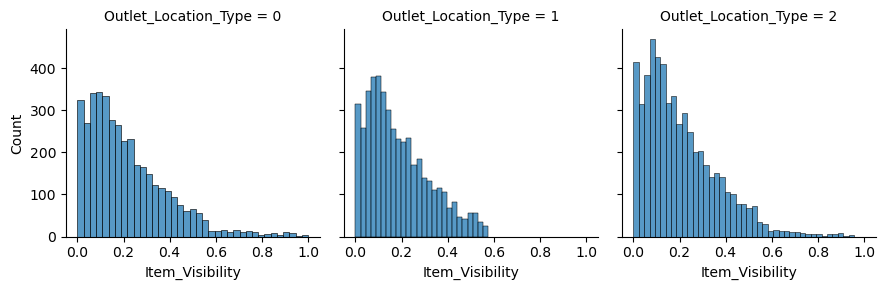

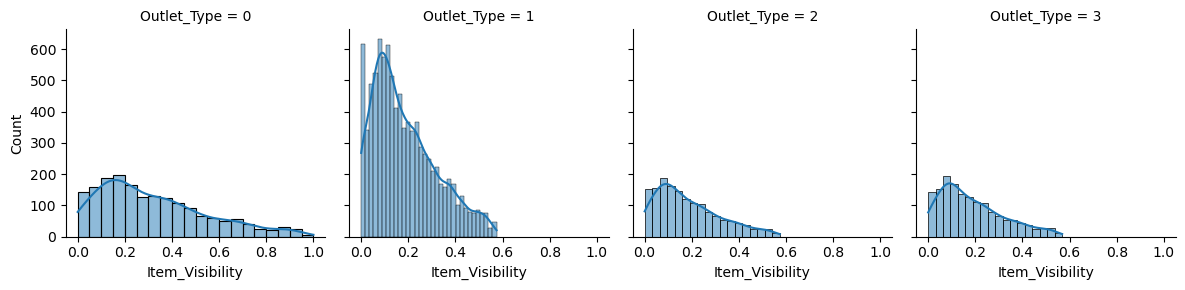

In [34]:
grid = sns.FacetGrid(data, col="Outlet_Location_Type", legend_out= True,)
grid.map(sns.histplot, "Item_Visibility")

grid = sns.FacetGrid(data, col="Outlet_Type", legend_out=True)
grid.map(sns.histplot, "Item_Visibility", kde = True)

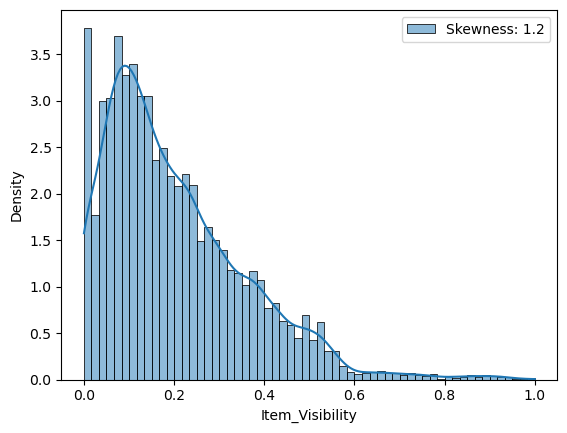

In [35]:
g = sns.histplot(data = data,x="Item_Visibility", kde=True, stat="density", label=("Skewness: {}".format(round(data["Item_Visibility"].skew(), 2))))
g.legend()

In [36]:
# Fixing the skewness of the Item_Visibility values
data["Item_Visibility"] = data["Item_Visibility"].map(lambda x: np.log(x) if x > 0 else 0)

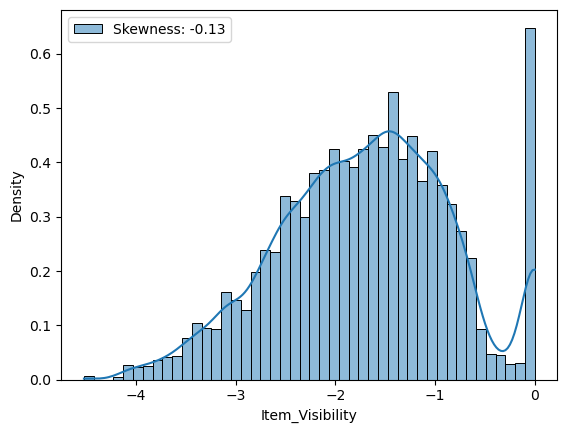

In [37]:
g = sns.histplot(data = data,x="Item_Visibility", kde=True, stat="density", label=("Skewness: {}".format(round(data["Item_Visibility"].skew(), 2))))
g.legend()

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\2828646952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


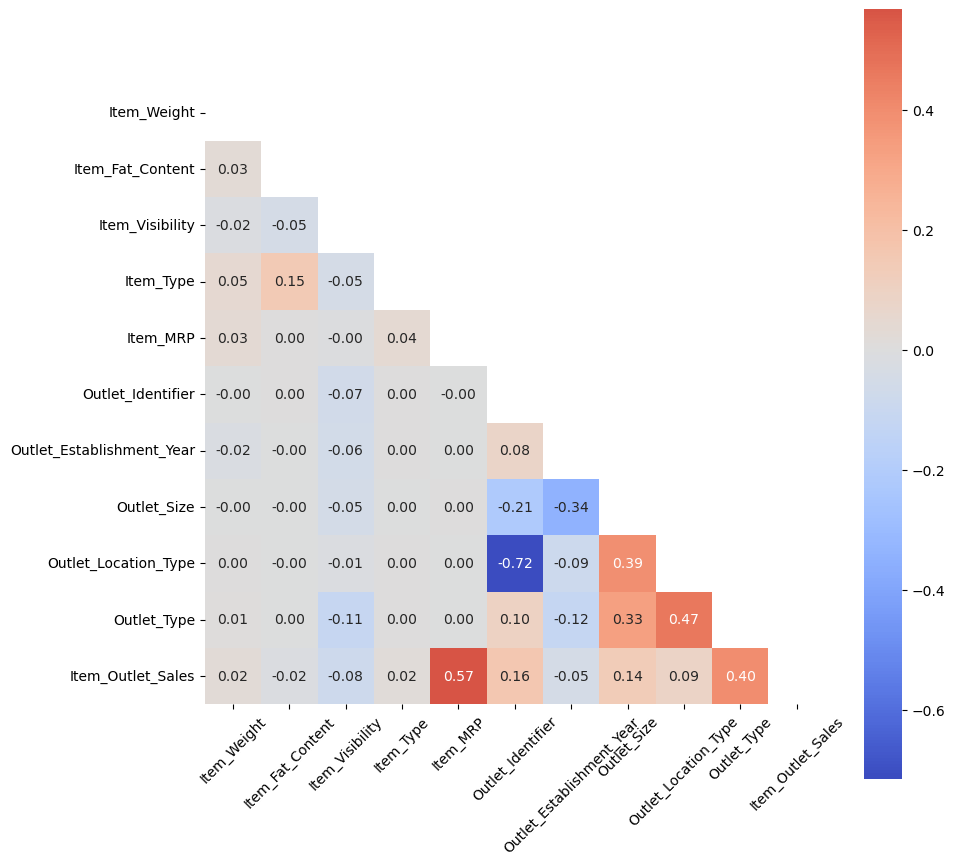

In [38]:
dataCorr(data)

In [39]:
data[["Item_Type", "Item_Outlet_Sales"]].groupby("Item_Type", as_index=False).mean().sort_values(by = "Item_Outlet_Sales")

,Item_Type,Item_Outlet_Sales
11,11,1926.139702
0,0,1952.971207
14,14,2006.511735
8,8,2010.000265
2,2,2111.808651
5,5,2132.867744
7,7,2139.221622
10,10,2158.977911
1,1,2204.132226
3,3,2225.194904


Item 15 has the highest average sales, but item 11 has the least

## Modeling

### Splitting Training and Testing data

In [40]:
test, train = data[data["Type"].eq("test")], data[data["Type"].eq("train")]

In [41]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
FDA15,9.300,1,-3.018664,4,249.8092,9,1999,1,0,1,3735.1380,train
DRC01,5.920,0,-2.835229,14,48.2692,3,2009,0,2,2,443.4228,train
FDN15,17.500,1,-2.975205,10,141.6180,9,1999,0,0,1,2097.2700,train
FDX07,19.200,0,0.000000,6,182.0950,0,1998,0,2,0,732.3800,train
NCD19,20.200,1,0.000000,9,53.8614,1,1987,2,2,1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,1,-1.754961,13,214.5218,1,1987,2,2,1,2778.3834,train
FDS36,8.380,0,-1.944431,0,108.1570,7,2002,0,1,1,549.2850,train
NCJ29,10.600,1,-2.233549,8,85.1224,6,2004,0,1,1,1193.1136,train
FDN46,7.210,0,-0.815951,13,103.1332,3,2009,1,2,2,1845.5976,train


In [42]:
X = train.drop(columns=["Type", "Item_Outlet_Sales"], axis=1)
y = train["Item_Outlet_Sales"]
W = test.drop(columns=["Type", "Item_Outlet_Sales"], axis=1)
z = test["Item_Outlet_Sales"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [68]:
def metrics(ypred, model, ytest):
    r2_report = r2_score(ytest, ypred)
    
    # Displaying Regression Score
    print(f"\nThe coefficient of determination (R2) Score is: {r2_report}")
    
    MAE = mean_absolute_error(ytest, ypred)
    MSE = mean_squared_error(ytest, ypred)

    print(f"MAE: {MAE}\nMSE: {MSE}")
    return MAE, MSE, r2_report

In [65]:
Linear_model = LinearRegression()
RF_model = RandomForestRegressor(criterion = "squared_error", max_depth = 50, n_estimators = 100, random_state = 42)
gbr_model = GradientBoostingRegressor(criterion = "squared_error", random_state = 42)

In [93]:
# training Linear Regression
Linear_model.fit(X_train, y_train)
Linear_pred = Linear_model.predict(X_test)

In [73]:
LR_MAE, LR_MSE, LR_R2 = metrics(Linear_pred, Linear_model, y_test)


The coefficient of determination (R2) Score is: 0.5047807348529092
MAE: 880.3355003664092
MSE: 1377059.4923983428


In [66]:
# training Random Forest Regression
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)

In [74]:
RF_MAE, RF_MSE, RF_R2 = metrics(RF_pred, RF_model, y_test)


The coefficient of determination (R2) Score is: 0.5541640967243311
MAE: 774.3351571829759
MSE: 1239738.850780361


In [71]:
# training Random Forest Regression
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

In [77]:
GBR_MAE, GBR_MSE, GBR_R2 = metrics(gbr_pred, gbr_model, y_test)


The coefficient of determination (R2) Score is: 0.5973383030703474
MAE: 739.1384537085721
MSE: 1119684.04907977


In [79]:
regression_list = {"Linear Regression": {"R2 Score": LR_R2,
                                           "MAE": LR_MAE,
                                           "MSE": LR_MSE
                                           },
                   "GBR": {"R2 Score": GBR_R2,
                           "MAE": GBR_MAE,
                           "MSE": GBR_MSE
                           },
                   "Random Forest": {"R2 Score": RF_R2,
                                     "MAE": RF_MAE,
                                     "MSE": RF_MSE
                                     }
                   }
regression_list = pd.DataFrame(regression_list)

regression_list

,Linear Regression,GBR,Random Forest
R2 Score,5.047807e-01,5.973383e-01,5.541641e-01
MAE,8.803355e+02,7.391385e+02,7.743352e+02
MSE,1.377059e+06,1.119684e+06,1.239739e+06


## using models to predict for Test data

In [100]:
LR_test = test
LR_X_test = test.drop(columns=["Type", "Item_Outlet_Sales"], axis=1)
LR_test_pred = Linear_model.predict(LR_X_test)
LR_test["Item_Outlet_Sales"] = LR_test_pred
LR_test.head()

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\2178346933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LR_test["Item_Outlet_Sales"] = LR_test_pred


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
FDW58,20.750,1,-3.770694,13,107.8622,9,1999,1,0,1,2054.463461,test
FDW14,8.300,0,-2.145427,4,87.3198,2,2007,0,1,1,1073.592052,test
NCN55,14.600,1,-1.193295,11,241.7538,0,1998,0,2,0,2293.932359,test
FDQ58,7.315,1,-3.060591,13,155.0340,2,2007,0,1,1,2147.623068,test
FDY38,20.200,0,-1.018454,4,234.2300,5,1985,1,2,3,5137.820499,test


In [101]:
RF_test = test
RF_X_test = test.drop(columns=["Type", "Item_Outlet_Sales"], axis=1)
RF_test_pred = RF_model.predict(RF_X_test)
RF_test["Item_Outlet_Sales"] = RF_test_pred
RF_test.head()

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\1880497656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RF_test["Item_Outlet_Sales"] = RF_test_pred


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
FDW58,20.750,1,-3.770694,13,107.8622,9,1999,1,0,1,1449.326756,test
FDW14,8.300,0,-2.145427,4,87.3198,2,2007,0,1,1,1261.910714,test
NCN55,14.600,1,-1.193295,11,241.7538,0,1998,0,2,0,572.108624,test
FDQ58,7.315,1,-3.060591,13,155.0340,2,2007,0,1,1,2430.922354,test
FDY38,20.200,0,-1.018454,4,234.2300,5,1985,1,2,3,5864.166660,test


In [102]:
gbr_test = test
gbr_X_test = test.drop(columns=["Type", "Item_Outlet_Sales"], axis=1)
gbr_test_pred = gbr_model.predict(gbr_X_test)
gbr_test["Item_Outlet_Sales"] = gbr_test_pred
gbr_test.head()

C:\Users\ziadh\AppData\Local\Temp\ipykernel_25312\4275767324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_test["Item_Outlet_Sales"] = gbr_test_pred


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
FDW58,20.750,1,-3.770694,13,107.8622,9,1999,1,0,1,1706.134767,test
FDW14,8.300,0,-2.145427,4,87.3198,2,2007,0,1,1,1348.382710,test
NCN55,14.600,1,-1.193295,11,241.7538,0,1998,0,2,0,689.308306,test
FDQ58,7.315,1,-3.060591,13,155.0340,2,2007,0,1,1,2571.189804,test
FDY38,20.200,0,-1.018454,4,234.2300,5,1985,1,2,3,6536.642736,test


### Saving test Values

In [104]:
LR_test.to_csv('TestData_with_LR_predictions.csv', index=True)
RF_test.to_csv('TestData_with_RF_predictions.csv', index=True)
gbr_test.to_csv('TestData_with_GBR_predictions.csv', index=True)

# Saving Models

In [81]:
import pickle

In [83]:
#saving LR model
filename = 'trained_Linear_Regression_model.pkl'
pickle.dump(Linear_model, open(filename, 'wb'))

In [85]:
#saving RF model
filename = 'trained_Random_Forrest_model.pkl'
pickle.dump(RF_model, open(filename, 'wb'))

In [84]:
#saving GBR model
filename = 'trained_GBR_model.pkl'
pickle.dump(gbr_model, open(filename, 'wb'))